### Exercice:

Scraping weather forecase from the The Weather Channel website `weather.com` using `requests` and `BeautifulSoup` libraries.

1. Implement a scraping script for getting 10 days weather forecasts of Benguerir city and Tanger City.
2. Store the data sets into Pandas DataFrame.
3. Use matplotlib library to plot the raining days of the two cities in the same figure.  


In [56]:
import requests
Bng = requests.get("https://weather.com/weather/tenday/l/f37580e42d804f6d54467e56dd9f296e15fe9a25db53ddee63601416ecc06111")
Tng = requests.get("https://weather.com/weather/tenday/l/701d5f2dd2a2b8cabcc505d69649a291257de6c1369a982396ea546ccb99198c")
#sending requests for bengrir and tangier pages

In [57]:
from bs4 import BeautifulSoup
soup_B = BeautifulSoup(Bng.content, 'lxml')
soup_T = BeautifulSoup(Tng.content, 'lxml')
#using lxml as a parser

In [58]:
array_b=[] #array bengrir will contain bg data
for i in range(1,11) :
         array_b.append([soup_B.find_all(attrs={"data-testid" : "daypartName"})[i].get_text(),
          soup_B.find_all(attrs={"class" : "DetailsSummary--highTempValue--3PjlX","data-testid" : "TemperatureValue"})[i].get_text(),
          soup_B.find_all(attrs={"class" : "DetailsSummary--lowTempValue--2tesQ","data-testid" : "TemperatureValue"})[i].get_text(),
         soup_B.find_all(attrs={"class" : "DetailsSummary--extendedData--307Ax"})[2*i].get_text(),
         soup_B.find_all(attrs={"class" : "Wind--windWrapper--3Ly7c undefined","data-testid" : "Wind"})[i].get_text(),
         soup_B.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[i].get_text()])
print(array_b)
#used loop from 1 to 10 to take 10 days and used combination classes names and data-testids names to catch the data we want

[['Sat 17', '65°', '46°', 'Partly Cloudy', 'E 8 mph', '15%'], ['Sun 18', '71°', '46°', 'Partly Cloudy', 'ESE 7 mph', '15%'], ['Mon 19', '73°', '45°', 'Mostly Sunny', 'E 7 mph', '15%'], ['Tue 20', '73°', '45°', 'Partly Cloudy', 'SSW 8 mph', '8%'], ['Wed 21', '71°', '44°', 'Mostly Sunny', 'ENE 8 mph', '8%'], ['Thu 22', '70°', '43°', 'Sunny', 'ENE 8 mph', '7%'], ['Fri 23', '71°', '43°', 'Sunny', 'SSW 8 mph', '7%'], ['Sat 24', '70°', '44°', 'Mostly Sunny', 'S 8 mph', '7%'], ['Sun 25', '69°', '46°', 'Partly Cloudy', 'S 9 mph', '7%'], ['Mon 26', '67°', '47°', 'Partly Cloudy', 'SSW 13 mph', '10%']]


In [47]:
array_t=[] #tangier
for i in range(1,11) :
         array_t.append([soup_T.find_all(attrs={"data-testid" : "daypartName"})[i].get_text(),
         soup_T.find_all(attrs={"class" : "DetailsSummary--highTempValue--3PjlX","data-testid" : "TemperatureValue"})[i].get_text(),
        soup_T.find_all(attrs={"class" : "DetailsSummary--lowTempValue--2tesQ","data-testid" : "TemperatureValue"})[i].get_text(),
        soup_T.find_all(attrs={"class" : "DetailsSummary--extendedData--307Ax"})[2*i].get_text(),
         soup_T.find_all(attrs={"class" : "Wind--windWrapper--3Ly7c undefined","data-testid" : "Wind"})[i].get_text(),
         soup_T.find_all(attrs={"class" : "DailyContent--value--1Jers","data-testid" : "PercentageValue"})[i].get_text()])

print(array_t)

[['Sat 17', '65°', '53°', 'Showers', 'SW 6 mph', '77%'], ['Sun 18', '68°', '58°', 'Partly Cloudy', 'E 14 mph', '14%'], ['Mon 19', '69°', '57°', 'Partly Cloudy', 'E 11 mph', '14%'], ['Tue 20', '70°', '59°', 'PM Showers', 'SE 8 mph', '12%'], ['Wed 21', '67°', '55°', 'AM Showers', 'SW 6 mph', '12%'], ['Thu 22', '66°', '54°', 'AM Fog/PM Sun', 'NNE 5 mph', '12%'], ['Fri 23', '66°', '54°', 'Sunny', 'S 5 mph', '40%'], ['Sat 24', '66°', '55°', 'Partly Cloudy', 'S 6 mph', '77%'], ['Sun 25', '67°', '56°', 'Partly Cloudy', 'SE 9 mph', '47%'], ['Mon 26', '65°', '57°', 'Showers', 'SE 13 mph', '15%']]


In [64]:
import pandas as pd
data_B = pd.DataFrame(array_b, columns=["Date","High","Low","Overall","Wind","Rain"])
data_B #transforming to pd dataframe

,Date,High,Low,Overall,Wind,Rain
0,Sat 17,65°,46°,Partly Cloudy,E 8 mph,15%
1,Sun 18,71°,46°,Partly Cloudy,ESE 7 mph,15%
2,Mon 19,73°,45°,Mostly Sunny,E 7 mph,15%
3,Tue 20,73°,45°,Partly Cloudy,SSW 8 mph,8%
4,Wed 21,71°,44°,Mostly Sunny,ENE 8 mph,8%
5,Thu 22,70°,43°,Sunny,ENE 8 mph,7%
6,Fri 23,71°,43°,Sunny,SSW 8 mph,7%
7,Sat 24,70°,44°,Mostly Sunny,S 8 mph,7%
8,Sun 25,69°,46°,Partly Cloudy,S 9 mph,7%
9,Mon 26,67°,47°,Partly Cloudy,SSW 13 mph,10%


In [65]:
import pandas as pd
data_T = pd.DataFrame(array_t, columns=["Date","High","Low","Overall","Wind","Rain"])
data_T

,Date,High,Low,Overall,Wind,Rain
0,Sat 17,65°,53°,Showers,SW 6 mph,77%
1,Sun 18,68°,58°,Partly Cloudy,E 14 mph,14%
2,Mon 19,69°,57°,Partly Cloudy,E 11 mph,14%
3,Tue 20,70°,59°,PM Showers,SE 8 mph,12%
4,Wed 21,67°,55°,AM Showers,SW 6 mph,12%
5,Thu 22,66°,54°,AM Fog/PM Sun,NNE 5 mph,12%
6,Fri 23,66°,54°,Sunny,S 5 mph,40%
7,Sat 24,66°,55°,Partly Cloudy,S 6 mph,77%
8,Sun 25,67°,56°,Partly Cloudy,SE 9 mph,47%
9,Mon 26,65°,57°,Showers,SE 13 mph,15%


In [66]:
def convert(s):
    strin = ""
    return(strin.join(s)) #used to transform list of letters to word
def percoff(Rain):
    for i in range(10):
        Rain[i] = list(Rain[i])[0:-1]
        Rain[i] = convert(Rain[i])
        Rain[i] = int(Rain[i])
    return Rain
#used to take off the % from the rain data and keep the int only


In [67]:
import matplotlib.pyplot as plt

Rain_B = data_B["Rain"]
Rain_T = data_T["Rain"]

RB = percoff(Rain_B)
RT = percoff(Rain_T)
#filtering rain data and taking off the percentage

In [68]:
RB

0    15
1    15
2    15
3     8
4     8
5     7
6     7
7     7
8     7
9    10
Name: Rain, dtype: object

In [69]:
RT

0    77
1    14
2    14
3    12
4    12
5    12
6    40
7    77
8    47
9    15
Name: Rain, dtype: object

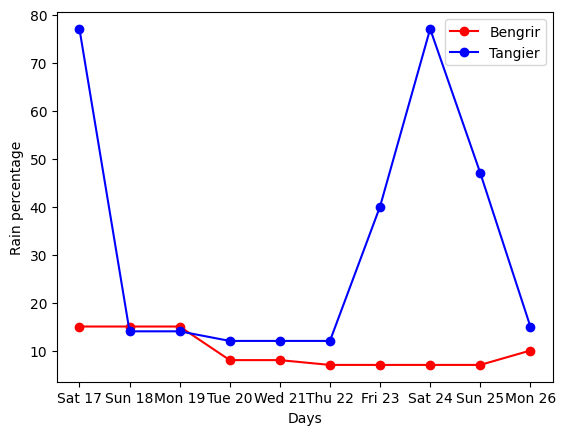

In [70]:

plt.plot(data_B["Date"],RB,marker = 'o',c='r',label="Bengrir")
plt.plot(data_T["Date"],RT,marker = 'o',c='b',label="Tangier")
plt.ylabel("Rain percentage")
plt.xlabel("Days")
plt.legend()
plt.show()
#bengrir plot in red compared to tangier plot in blue, tangier is more rainy than bengrir 

In [55]:
# THE END !